### Install Dependencies and Setup

In [1]:
#!pip install tensorflow opencv-python matplotlib

In [2]:
import tensorflow as tf

In [3]:
!pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
alabaster                          0.7.12
altair                             5.1.2
anaconda-client                    1.7.2
anaconda-navigator                 2.0.3
anaconda-project                   0.9.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.5
astropy                            4.2.1
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.6
Babel                              2.9.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.5
backports.shutil-get-terminal-size 1.0.0

In [4]:
import os # To navigate the file structure

In [5]:
# List all the GPU devices on my machine
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[]

In [6]:
# List all the CPU devices on my machine
cpus = tf.config.experimental.list_physical_devices('CPU')
cpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [7]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
# Limiting the memory and telling the GPUs not to use up all the memory
# The GPUs can only use what they need

for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

### Removing Dodgy Images

In [8]:
import cv2 # allows for computer vision
import imghdr # allows to check file exension
import matplotlib.pyplot as plt

C:\Users\HP\AppData\Local\Temp\ipykernel_11916\1631526694.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr # allows to check file exension


In [9]:
data_dir = 'data'

In [10]:
os.listdir('data')

['happy', 'sad']

In [11]:
img = cv2.imread(os.path.join('data', 'happy', '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg'))

In [12]:
img.shape

(733, 1000, 3)

In [13]:
type(img)

numpy.ndarray

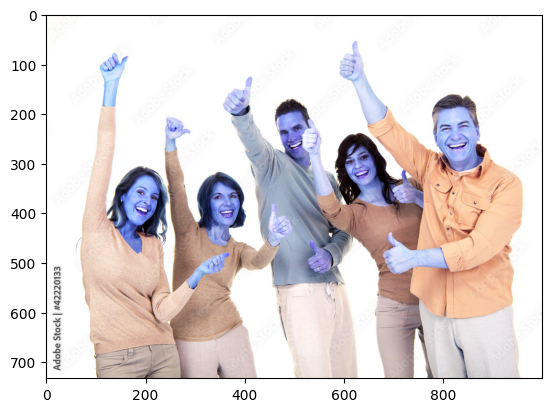

In [14]:
plt.imshow(img) #matplotlip reads RGB colors

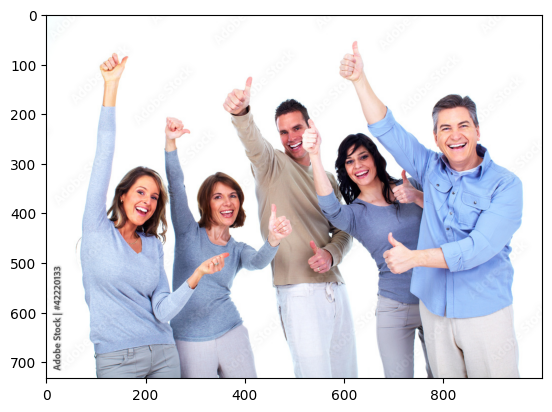

In [15]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # opencv reads in image as BGR 
#  we had to convert to RGB so matplotlib can read correctly

In [16]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [17]:
for image_class in os.listdir(data_dir): # ['happy', 'sad'] will be iterated os.listdir(data_dir) finds all subdirectory in a directory
    for image in os.listdir(os.path.join(data_dir, image_class)): # os.path.join() joins names to form a filepath i.e data\happy\
        image_path = os.path.join(data_dir, image_class, image) # adds the image name to the file path i.e data\happy\image.jpg
        try:
            img = cv2.imread(image_path) # Reads the image of the file path as a numpy array
            tip = imghdr.what(image_path) # Checks the type of extension of the filepath
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path) # Deletes a file in the filepath
        except Exception as e:
            print('Issue with image {}'.format(image_path))

### Load dataset

In [18]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [19]:
import numpy as np

In [20]:
# Build data pipeline
data = tf.keras.utils.image_dataset_from_directory('data') # used to load image data and performs a bunch of stuff on them 

Found 280 files belonging to 2 classes.


- The **data** is a generator and not yet in memory; the images wont be gotten with data[0] and all

In [21]:
# Access data pipeline and allows us to loop through
data_iterator = data.as_numpy_iterator() # Convert to a numpy iterator to be able to access it

In [22]:
# Iterate the images and get consecutive images
# This actually gets a batch of data, or images, if its run again, the set of images will change
batch = data_iterator.next()

In [23]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [24]:
# Image Labels represented in 1 and 0 (happy or sad)
batch[1]

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1])

- To know which class belong to sad and happy we will have to plot

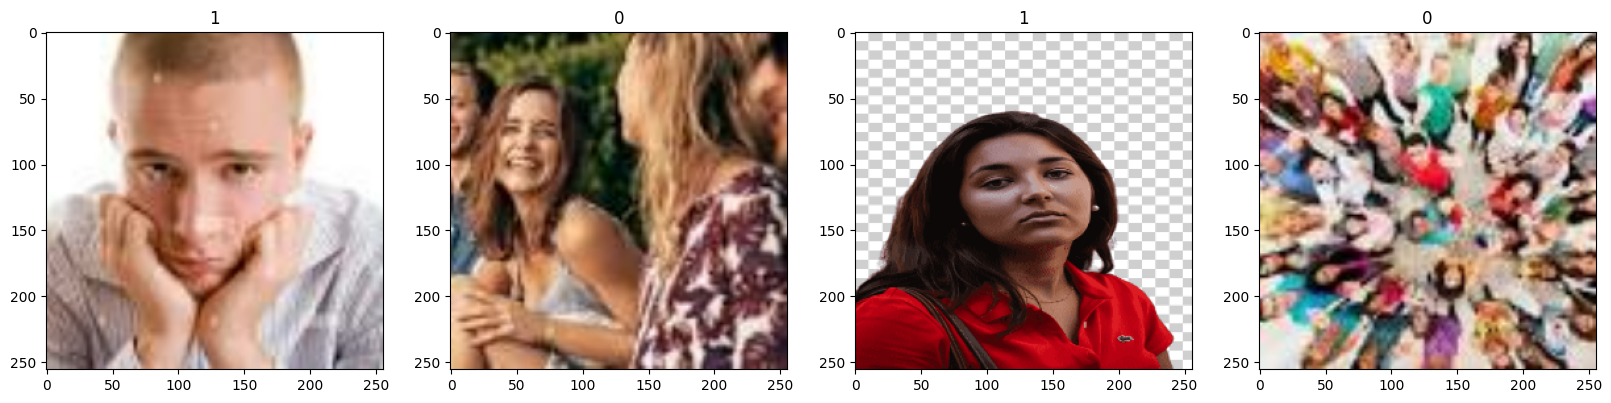

In [25]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### Preprocess Data

#### Scale Data

In [26]:
batch[0].min()

0.0

In [27]:
batch[0].max()

255.0

In [28]:
data = data.map(lambda x,y: (x/255, y)) #x=images y=labels make the images between 0 and 1

In [29]:
scaled_iterator = data.as_numpy_iterator()

In [30]:
batch = scaled_iterator.next()

In [31]:
batch[0].max()

1.0

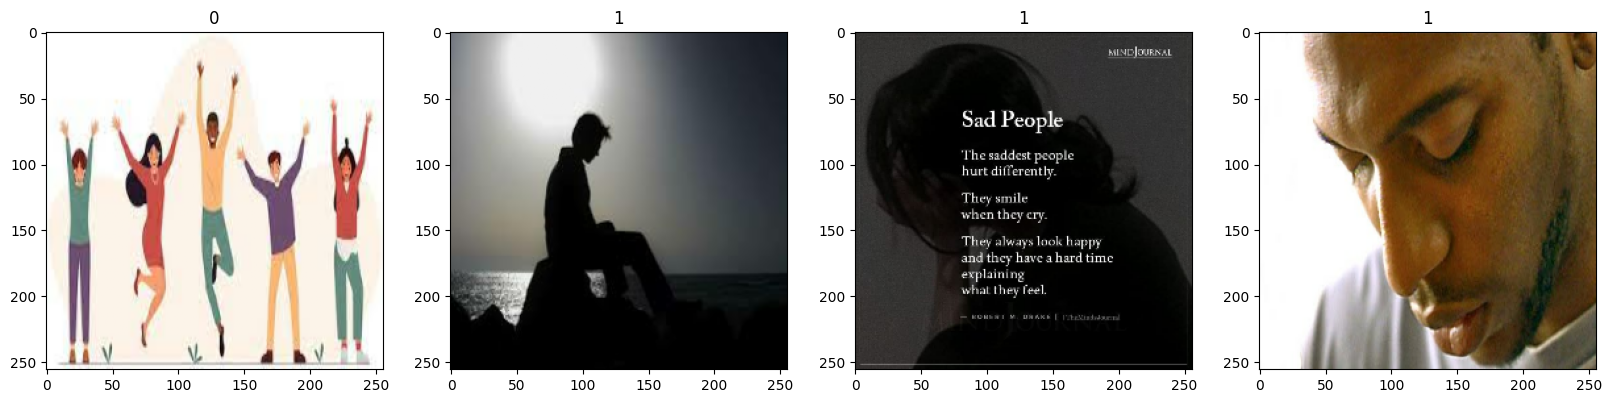

In [32]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

#### Split Data

In [33]:
len(data)

9

In [34]:
train_size = int(len(data)*.6) # train model
val_size = int(len(data)* .3) + 1 # validation
test_size = int(len(data)*.1) +1

In [35]:
train_size + val_size + test_size

9

In [36]:
# Allocate the data to the train, validation and test data 
# take ----> allocate
# skip -----> remove the ones taken and shuffle the rest
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

### Deep Learning Model

#### Build Deep Learning Model

In [37]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [38]:
model = Sequential()

In [39]:
#
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [40]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

#### Train

In [42]:
logdir = 'logs'

In [43]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [44]:
hist = model.fit(train, epochs = 20, validation_data = val, callbacks=[tensorboard_callback])

Epoch 1/20


5/5 [==============================] - 37s 3s/step - loss: 1.2414 - accuracy: 0.4563 - val_loss: 0.7489 - val_accuracy: 0.4583
Epoch 2/20
5/5 [==============================] - 7s 1s/step - loss: 0.6766 - accuracy: 0.4938 - val_loss: 0.6431 - val_accuracy: 0.4792
Epoch 3/20
5/5 [==============================] - 6s 1s/step - loss: 0.7113 - accuracy: 0.4938 - val_loss: 0.6810 - val_accuracy: 0.5104
Epoch 4/20
5/5 [==============================] - 6s 1s/step - loss: 0.6675 - accuracy: 0.5938 - val_loss: 0.6303 - val_accuracy: 0.7917
Epoch 5/20
5/5 [==============================] - 6s 1000ms/step - loss: 0.6294 - accuracy: 0.7312 - val_loss: 0.5810 - val_accuracy: 0.6667
Epoch 6/20
5/5 [==============================] - 6s 1s/step - loss: 0.5609 - accuracy: 0.7063 - val_loss: 0.5465 - val_accuracy: 0.7708
Epoch 7/20
5/5 [==============================] - 6s 1s/step - loss: 0.5366 - accuracy: 0.7125 - val_loss: 0.4442 - val_accuracy: 0.8021
Epoch 8/20
5/5 [==================

In [45]:
hist.history

{'loss': [1.2414320707321167,
  0.6765913963317871,
  0.711288332939148,
  0.6674720048904419,
  0.6293760538101196,
  0.5609378814697266,
  0.5365773439407349,
  0.45803898572921753,
  0.3591037690639496,
  0.297721803188324,
  0.22996249794960022,
  0.33921098709106445,
  0.2629590630531311,
  0.21542096138000488,
  0.1529591977596283,
  0.11236470937728882,
  0.2420959174633026,
  0.12519729137420654,
  0.09916762262582779,
  0.10926090180873871],
 'accuracy': [0.45625001192092896,
  0.4937500059604645,
  0.4937500059604645,
  0.59375,
  0.731249988079071,
  0.706250011920929,
  0.7124999761581421,
  0.78125,
  0.862500011920929,
  0.8500000238418579,
  0.8999999761581421,
  0.824999988079071,
  0.8812500238418579,
  0.918749988079071,
  0.949999988079071,
  0.9624999761581421,
  0.893750011920929,
  0.96875,
  0.981249988079071,
  0.9750000238418579],
 'val_loss': [0.7489129900932312,
  0.6431121230125427,
  0.6809985637664795,
  0.6302857398986816,
  0.5809665322303772,
  0.546519

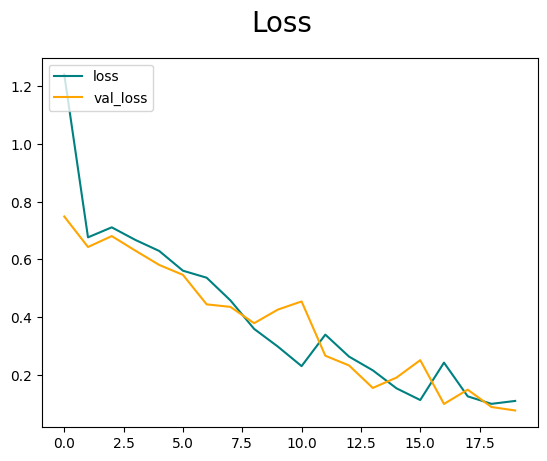

In [46]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

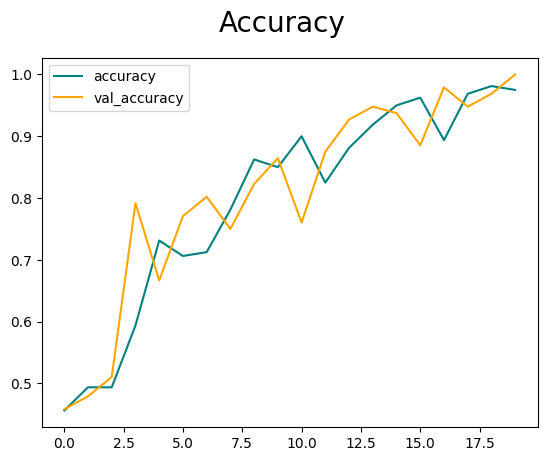

In [47]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### Evaluate Performance

#### Evaluate

In [48]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [49]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [50]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 472ms/step


In [51]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy Score: {acc.result().numpy()}')

Precision: 1.0, Recall: 1.0, Accuracy Score: 1.0


#### Test

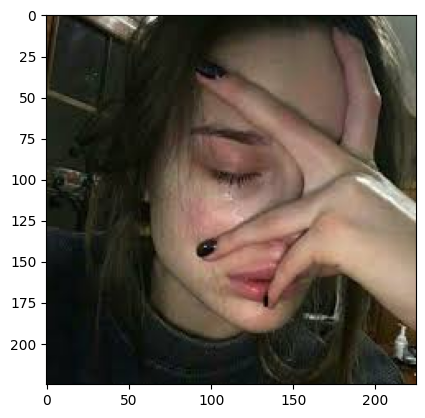

In [52]:
img = cv2.imread('sad_test.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

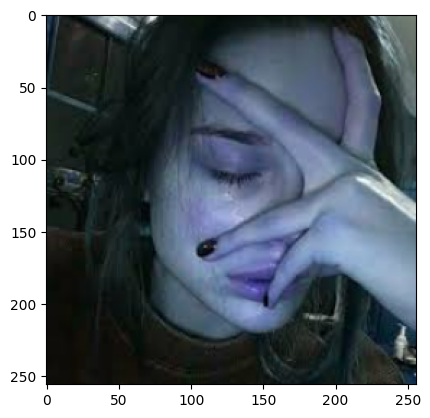

In [53]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [54]:
resize.shape

TensorShape([256, 256, 3])

In [55]:
np.expand_dims(resize, 0).shape # our neural network expects a batch so we are tring to increase the dimension of the one image we are testing for

(1, 256, 256, 3)

In [56]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 193ms/step


In [57]:
yhat

array([[0.9992383]], dtype=float32)

In [58]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


### Save the Model

In [59]:
from tensorflow.keras.models import load_model

In [60]:
model.save(os.path.join('models','imageclassifier.h5'))

C:\Users\HP\Documents\KESHTECH\DSML\Projects\ImageClassification\imageclassification\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [61]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))

In [62]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 108ms/step


In [63]:
if yhatnew > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
